In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from google.colab import files
uploaded = files.upload()


# Load the dataset
df = pd.read_csv("spice_shop_data_fixed_weights_10000.csv")
df['production_date'] = pd.to_datetime(df['production_date'])
df['year_month'] = df['production_date'].dt.to_period('M')

Saving spice_shop_data_fixed_weights_10000.csv to spice_shop_data_fixed_weights_10000.csv


Top 10 Products by Total Quantity

/tmp/ipython-input-1974716992.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_10_products.values, y=top_10_products.index, palette="viridis")
/tmp/ipython-input-1974716992.py:8: UserWarning: Glyph 128285 (\N{TOP WITH UPWARDS ARROW ABOVE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128285 (\N{TOP WITH UPWARDS ARROW ABOVE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


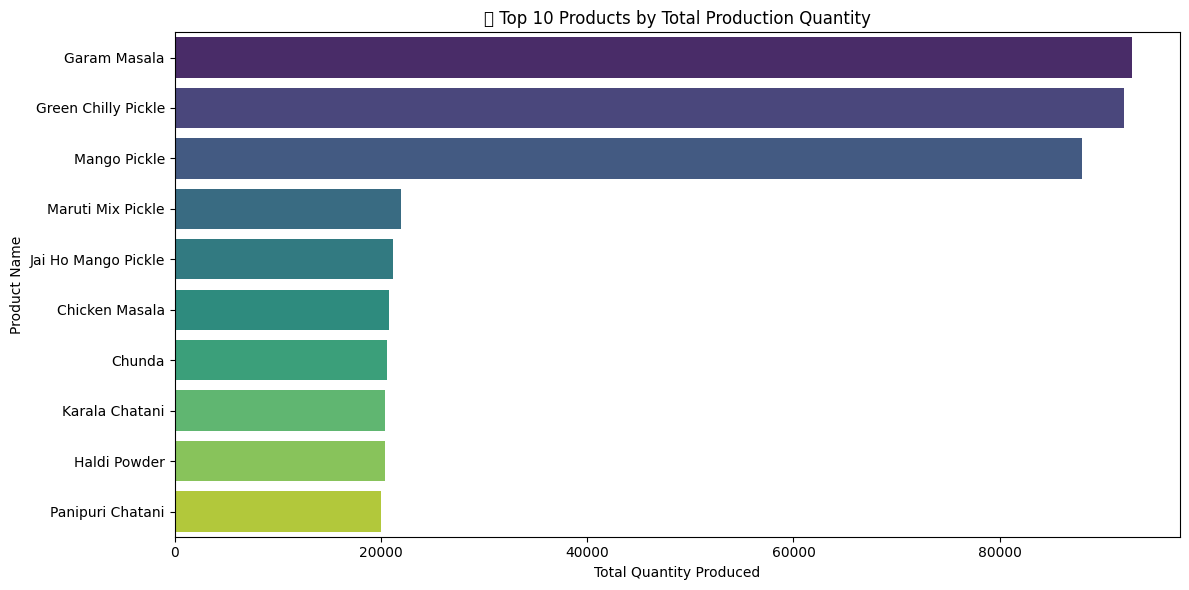

In [4]:
top_10_products = df.groupby('product_name')['in_stock_quantity'].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(12, 6))
sns.barplot(x=top_10_products.values, y=top_10_products.index, palette="viridis")
plt.title("🔝 Top 10 Products by Total Production Quantity")
plt.xlabel("Total Quantity Produced")
plt.ylabel("Product Name")
plt.tight_layout()
plt.show()

2. Operator Performance (Batches & Avg Cost per Unit)

/usr/local/lib/python3.12/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 128104 (\N{MAN}) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
/usr/local/lib/python3.12/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 127981 (\N{FACTORY}) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128104 (\N{MAN}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 127981 (\N{FACTORY}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


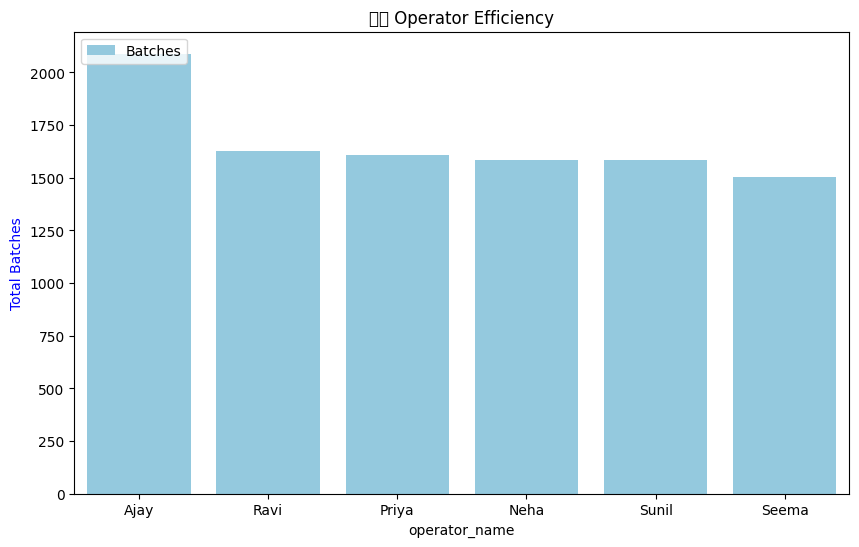

In [5]:
operator_stats = df.groupby('operator_name').agg(
    total_batches=('batch_id', 'count'),
    avg_cost_per_unit=('cost_per_unit', 'mean')
).sort_values(by='total_batches', ascending=False)

fig, ax1 = plt.subplots(figsize=(10, 6))
sns.barplot(x=operator_stats.index, y=operator_stats['total_batches'], color='skyblue', label="Batches", ax=ax1)
ax1.set_ylabel("Total Batches", color='blue')
ax1.set_title("👨‍🏭 Operator Efficiency")
ax1.legend(loc='upper left')


Twin axis for cost

In [7]:
ax2 = ax1.twinx()
sns.lineplot(x=operator_stats.index, y=operator_stats['avg_cost_per_unit'], marker='o', color='red', label="Avg Cost/unit", ax=ax2)
ax2.set_ylabel("Avg Cost per Unit", color='red')
plt.tight_layout()
plt.show()

<Figure size 640x480 with 0 Axes>

3. Monthly Production Trend

/tmp/ipython-input-1497578694.py:9: UserWarning: Glyph 128198 (\N{TEAR-OFF CALENDAR}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128198 (\N{TEAR-OFF CALENDAR}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128198 (\N{TEAR-OFF CALENDAR}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


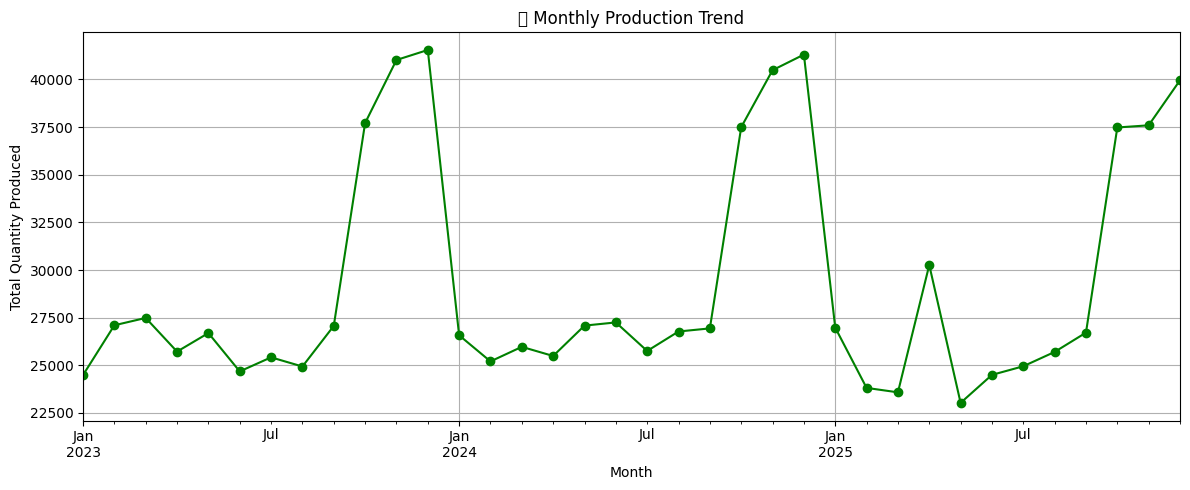

In [8]:
monthly_trend = df.groupby('year_month')['in_stock_quantity'].sum()

plt.figure(figsize=(12, 5))
monthly_trend.plot(kind='line', marker='o', color='green')
plt.title("📆 Monthly Production Trend")
plt.xlabel("Month")
plt.ylabel("Total Quantity Produced")
plt.grid(True)
plt.tight_layout()
plt.show()

4. Green Chilly Pickle – Weight per Unit Consistency

/tmp/ipython-input-2477725117.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gcp['weight_per_unit'] = gcp['total_weight_kg'] / gcp['in_stock_quantity']


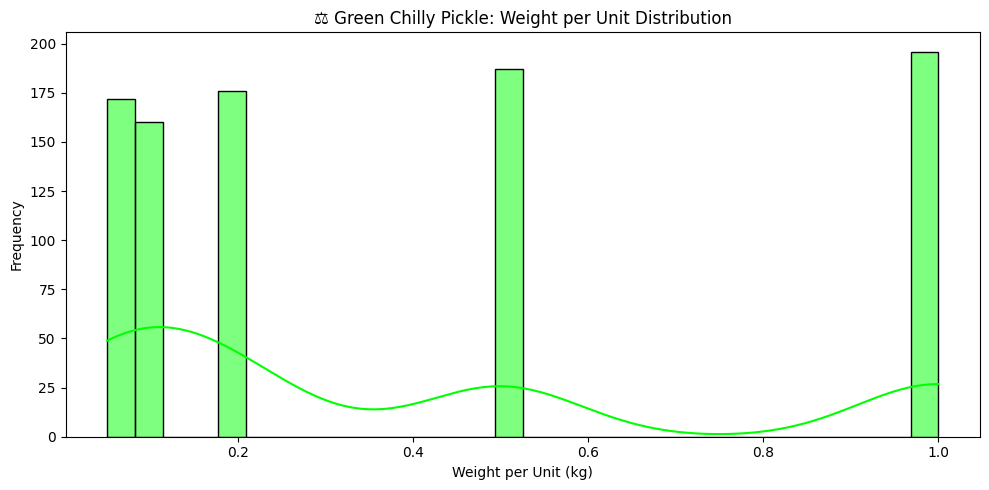

In [9]:
gcp = df[df['product_name'] == 'Green Chilly Pickle']
gcp['weight_per_unit'] = gcp['total_weight_kg'] / gcp['in_stock_quantity']

plt.figure(figsize=(10, 5))
sns.histplot(gcp['weight_per_unit'], bins=30, kde=True, color='lime')
plt.title("⚖️ Green Chilly Pickle: Weight per Unit Distribution")
plt.xlabel("Weight per Unit (kg)")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()

5. Lasun Pickle Production Trend

/tmp/ipython-input-2356364991.py:10: UserWarning: Glyph 128201 (\N{CHART WITH DOWNWARDS TREND}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128201 (\N{CHART WITH DOWNWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128201 (\N{CHART WITH DOWNWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


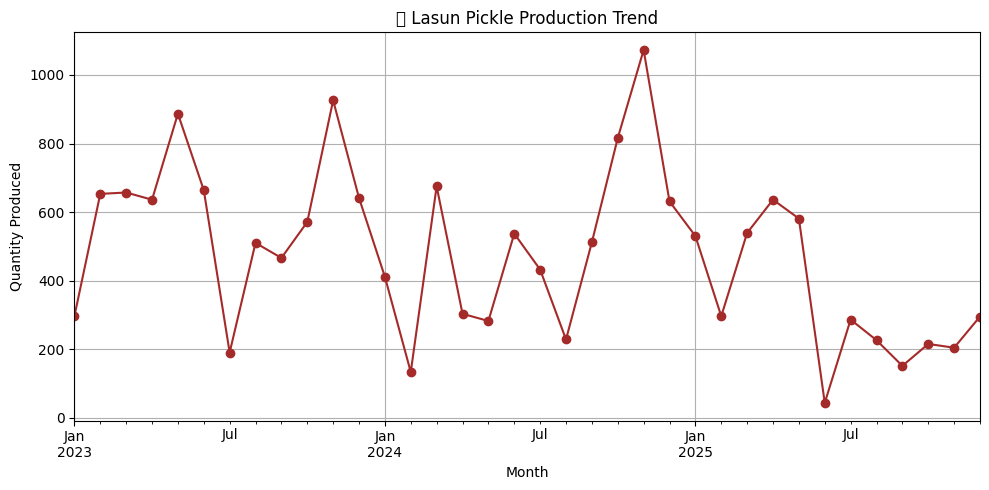

In [10]:
lasun = df[df['product_name'] == 'Lasun Pickle']
lasun_trend = lasun.groupby('year_month')['in_stock_quantity'].sum()

plt.figure(figsize=(10, 5))
lasun_trend.plot(marker='o', color='brown')
plt.title("📉 Lasun Pickle Production Trend")
plt.xlabel("Month")
plt.ylabel("Quantity Produced")
plt.grid(True)
plt.tight_layout()
plt.show()

6. Print Count Distribution

/tmp/ipython-input-3291446353.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='printed_by', y='print_count', palette='pastel')
/tmp/ipython-input-3291446353.py:6: UserWarning: Glyph 128424 (\N{PRINTER}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128424 (\N{PRINTER}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


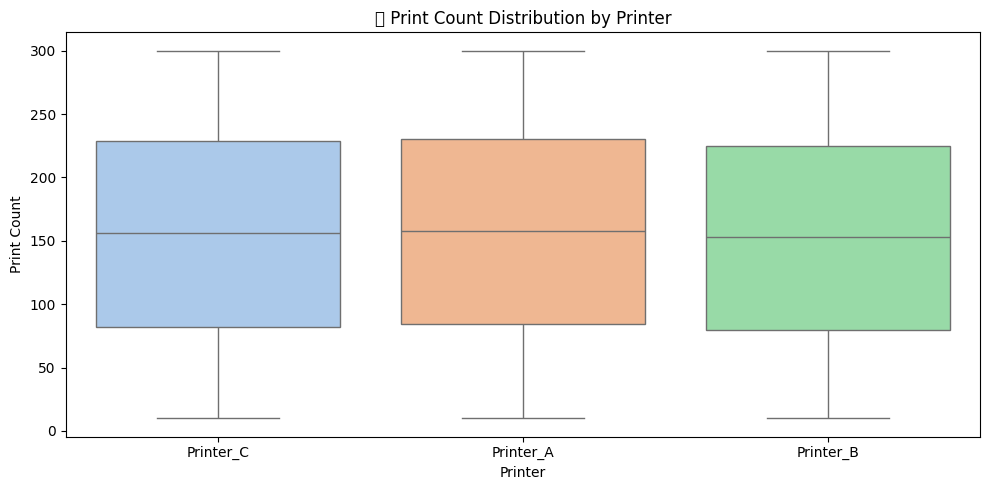

In [11]:
plt.figure(figsize=(10, 5))
sns.boxplot(data=df, x='printed_by', y='print_count', palette='pastel')
plt.title("🖨️ Print Count Distribution by Printer")
plt.xlabel("Printer")
plt.ylabel("Print Count")
plt.tight_layout()
plt.show()